In [1]:
import os
import math
import time
import random
import datetime
import operator 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline 

# DATA PREPROCESSING:

In [2]:
confirmed_cases = pd.read_csv('COVID-19-Dataset/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92520,92630,92754,92920,93106,93201,93279,93428,93627,93947


In [4]:
confirmed_cases.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1251,1252,1255,1255,1257,1257,1258,1258,1258,1258
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3371508,3411160,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,221139,221368,221559,221699,221880,221948,221982,222139,222269,222409
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5565,5567,5567,5568,5570,5572,5574,5576,5576,5579


In [5]:
deaths_reported = pd.read_csv('COVID-19-Dataset/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
deaths_reported.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,685,696,704,709,715,725,731,735,742,745
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,71771,72265,72699,73391,73688,74063,74480,75056,75588,76135
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,4346,4357,4364,4371,4386,4392,4394,4400,4411,4416
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54


In [7]:
recovered_cases = pd.read_csv('COVID-19-Dataset/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
recovered_cases.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1182,1184,1188,1188,1192,1192,1200,1200,1200,1200
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,2992325,3009150,3035134,3060145,3083298,3106949,3133183,3157660,3181288,3219474
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,209222,209508,209980,210464,210835,211057,211375,211634,211957,212265
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
latest_data = pd.read_csv('COVID-19-Dataset/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2021.csv')

In [10]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-29 04:20:55,33.93911,67.709953,59370,2611,52974.0,3785.0,Afghanistan,152.510994,4.397844
1,NaN,NaN,NaN,Albania,2021-04-29 04:20:55,41.15330,20.168300,130859,2386,107887.0,20586.0,Albania,4547.188825,1.823337
2,NaN,NaN,NaN,Algeria,2021-04-29 04:20:55,28.03390,1.659600,121580,3234,84745.0,33601.0,Algeria,277.256803,2.659977
3,NaN,NaN,NaN,Andorra,2021-04-29 04:20:55,42.50630,1.521800,13148,125,12590.0,433.0,Andorra,17016.760500,0.950715
4,NaN,NaN,NaN,Angola,2021-04-29 04:20:55,-11.20270,17.873900,26168,591,23584.0,1993.0,Angola,79.619627,2.258484


In [11]:
#Dataset: confirmed_cases, deaths_reported,  recovered_cases, latest_data

In [12]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 496 entries, Province/State to 5/27/21
dtypes: float64(2), int64(492), object(2)
memory usage: 1.0+ MB


In [13]:
deaths_reported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 496 entries, Province/State to 5/27/21
dtypes: float64(2), int64(492), object(2)
memory usage: 1.0+ MB


In [14]:
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 496 entries, Province/State to 5/27/21
dtypes: float64(2), int64(492), object(2)
memory usage: 1011.5+ KB


In [15]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3812 non-null   object 
 3   Country_Region       3984 non-null   object 
 4   Last_Update          3984 non-null   object 
 5   Lat                  3896 non-null   float64
 6   Long_                3896 non-null   float64
 7   Confirmed            3984 non-null   int64  
 8   Deaths               3984 non-null   int64  
 9   Recovered            707 non-null    float64
 10  Active               706 non-null    float64
 11  Combined_Key         3984 non-null   object 
 12  Incident_Rate        3896 non-null   float64
 13  Case_Fatality_Ratio  3944 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 435.9+ KB


In [16]:
confirmed_cases.shape

(276, 496)

In [17]:
deaths_reported.shape

(276, 496)

In [18]:
recovered_cases.shape 

(261, 496)

In [19]:
latest_data.shape

(3984, 14)

In [20]:
confirmed_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02
mean,20.447559,22.328281,2.018116,2.373188,3.409420,5.192029,7.673913,10.605072,20.210145,22.344203,...,5.950428e+05,5.974743e+05,5.984867e+05,6.007543e+05,6.028478e+05,6.045727e+05,6.062187e+05,6.081457e+05,6.101765e+05,6.121970e+05
std,25.189838,74.369096,26.781738,26.879567,33.464159,46.575328,65.089830,87.699030,215.201418,216.521511,...,2.775108e+06,2.787589e+06,2.797198e+06,2.808982e+06,2.819859e+06,2.828976e+06,2.837786e+06,2.847660e+06,2.857948e+06,2.867373e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.933349,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.312000e+03,1.316000e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.328250e+03,1.335000e+03
50%,21.607879,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.867650e+04,1.868250e+04,1.869000e+04,1.888950e+04,1.897900e+04,1.899650e+04,1.901950e+04,1.904750e+04,1.907100e+04,1.909950e+04
75%,40.950592,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.465390e+05,2.492698e+05,2.504960e+05,2.512458e+05,2.518208e+05,2.522262e+05,2.525150e+05,2.527770e+05,2.530820e+05,2.533535e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.299733e+07,3.302662e+07,3.305676e+07,3.308511e+07,3.310488e+07,3.311774e+07,3.314366e+07,3.316642e+07,3.319047e+07,3.321800e+07


In [21]:
deaths_reported.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,20.447559,22.328281,0.061594,0.065217,0.094203,0.152174,0.202899,0.297101,0.474638,0.481884,...,12334.851449,12383.199275,12429.489130,12475.775362,12516.884058,12551.492754,12583.463768,12629.666667,12675.518116,12721.753623
std,25.189838,74.369096,1.023280,1.024830,1.446690,2.408778,3.131446,4.575682,7.524221,7.524725,...,51933.913390,52131.806339,52329.281871,52520.048682,52688.611368,52822.293448,52944.604575,53139.770636,53349.206380,53566.287182
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.933349,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000
50%,21.607879,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,241.500000,242.000000,242.500000,244.500000,246.500000,254.000000,255.500000,258.000000,259.000000,261.000000
75%,40.950592,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3472.250000,3485.250000,3486.000000,3489.750000,3495.750000,3495.750000,3505.000000,3512.500000,3515.500000,3517.250000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,587300.000000,587955.000000,588620.000000,589223.000000,589703.000000,589893.000000,590320.000000,590941.000000,591950.000000,593288.000000


In [22]:
recovered_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
count,260.000000,260.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,19.016304,27.737245,0.114943,0.122605,0.149425,0.160920,0.214559,0.249042,0.413793,0.486590,...,3.852569e+05,3.879313e+05,3.903707e+05,3.927262e+05,3.950893e+05,3.970126e+05,3.994171e+05,4.016281e+05,4.037476e+05,4.064237e+05
std,24.632725,71.847810,1.737097,1.740995,1.932687,1.997346,2.631163,2.828979,4.985869,5.483964,...,1.723279e+06,1.744509e+06,1.763793e+06,1.782749e+06,1.801814e+06,1.817403e+06,1.835971e+06,1.852665e+06,1.868685e+06,1.887780e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.562000,-9.496274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+03,1.000000e+03,1.002000e+03,1.003000e+03,1.025000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03
50%,19.584785,24.242250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.243700e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04
75%,38.991325,90.375625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.826930e+05,1.836960e+05,1.843730e+05,1.852430e+05,1.862230e+05,1.866780e+05,1.874460e+05,1.876910e+05,1.885670e+05,1.894760e+05
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,2.198636e+07,2.235544e+07,2.271274e+07,2.307036e+07,2.342547e+07,2.372801e+07,2.405486e+07,2.435082e+07,2.463395e+07,2.489341e+07


In [23]:
latest_data.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3266.000000,3896.000000,3896.000000,3.984000e+03,3984.000000,7.070000e+02,7.060000e+02,3896.000000,3944.000000
mean,32401.272811,35.975407,-72.060342,3.755594e+04,790.944277,1.228332e+05,3.962135e+04,8611.718801,2.042340
std,18033.806874,13.038331,53.675701,2.049521e+05,4447.213647,3.490168e+05,2.692251e+05,3914.838012,2.777815
min,66.000000,-52.368000,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.858844e+06,0.000000,0.000000
25%,19049.500000,33.268297,-96.618047,1.100750e+03,18.000000,6.170000e+02,3.982500e+02,6517.040192,1.212493
50%,30068.000000,37.949334,-86.859840,3.064000e+03,56.000000,1.703800e+04,3.317500e+03,9194.644840,1.775736
75%,47040.500000,42.222517,-77.494046,1.242175e+04,193.250000,7.633600e+04,2.583800e+04,11096.755562,2.487359
max,99999.000000,71.706900,178.065000,5.521227e+06,112134.000000,4.212461e+06,5.115685e+06,35747.684973,129.367631


In [24]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/18/21', '5/19/21', '5/20/21', '5/21/21', '5/22/21', '5/23/21',
       '5/24/21', '5/25/21', '5/26/21', '5/27/21'],
      dtype='object', length=496)

In [25]:
#Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [26]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,0,0,0,0,0,0,0,0,0,0,...,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366
1,0,0,0,0,0,0,0,0,0,0,...,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264
2,0,0,0,0,0,0,0,0,0,0,...,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926
3,0,0,0,0,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682
4,0,0,0,0,0,0,0,0,0,0,...,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,2,2,2,2,2,2,2,2,2,...,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356
272,0,0,0,0,0,0,0,0,0,0,...,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795
273,0,0,0,0,0,0,0,0,0,0,...,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696
274,0,0,0,0,0,0,0,0,0,0,...,92520,92630,92754,92920,93106,93201,93279,93428,93627,93947


In [27]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,0,0,0,0,0,0,0,0,0,0,...,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869
1,0,0,0,0,0,0,0,0,0,0,...,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447
2,0,0,0,0,0,0,0,0,0,0,...,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448
3,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,0,0,0,0,0,0,0,0,0,0,...,685,696,704,709,715,725,731,735,742,745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,0,0,...,37,37,39,41,42,43,44,44,45,46
272,0,0,0,0,0,0,0,0,0,0,...,3437,3448,3448,3452,3459,3459,3470,3480,3483,3483
273,0,0,0,0,0,0,0,0,0,0,...,1297,1298,1301,1302,1304,1307,1310,1311,1313,1315
274,0,0,0,0,0,0,0,0,0,0,...,1263,1263,1265,1266,1267,1268,1271,1271,1273,1275


In [28]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,0,0,0,0,0,0,0,0,0,0,...,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962
1,0,0,0,0,0,0,0,0,0,0,...,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042
2,0,0,0,0,0,0,0,0,0,0,...,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040
3,0,0,0,0,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405
4,0,0,0,0,0,0,0,0,0,0,...,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,0,0,0,0,0,0,0,0,0,...,2687,2687,2687,2689,2721,2721,2794,2794,2853,2853
257,0,0,0,0,0,0,0,0,0,0,...,293808,295643,295643,296901,297201,297201,298502,299024,299559,299559
258,0,0,0,0,0,0,0,0,0,0,...,3072,3120,3159,3179,3201,3245,3260,3273,3306,3339
259,0,0,0,0,0,0,0,0,0,0,...,90892,90919,90955,91019,91102,91156,91200,91221,91239,91321


In [29]:
#Range of date
dates = confirmed.keys()

#Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

#Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

#Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

#Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [30]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/18/21', '5/19/21', '5/20/21', '5/21/21', '5/22/21', '5/23/21',
       '5/24/21', '5/25/21', '5/26/21', '5/27/21'],
      dtype='object', length=492)

In [31]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [32]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958602,
 1041662,
 1125221,
 1183584,
 1256176,
 1329331,
 1399162,
 1482540,
 1569554,
 1655088,
 1729371,
 1849067,
 1919809,
 2003820,
 2080934,
 2176465,
 2264462,
 2341702,
 2418307,
 2494325,
 2570074,
 2651321,
 2735570,
 2819666,
 2901925,
 2973513,
 3043705,
 3119245,
 3196355,
 3279850,
 3368226,
 3447426,
 3523799,
 3601488,
 3681990,
 3772018,
 3860724,
 3951003,
 4036226,
 4111202,
 4187833,
 4272324,
 4357304

In [33]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3349,
 3460,
 3564,
 3803,
 3993,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7967,
 8874,
 9985,
 11470,
 13192,
 14878,
 16827,
 19117,
 21927,
 24962,
 28450,
 32180,
 35699,
 39780,
 44528,
 50526,
 56413,
 62574,
 68488,
 73676,
 79614,
 87872,
 94683,
 102467,
 109845,
 116017,
 121876,
 127842,
 134812,
 143285,
 150544,
 158938,
 165083,
 170316,
 176188,
 183461,
 190325,
 197153,
 203923,
 209551,
 213530,
 218276,
 224854,
 231579,
 237421,
 242572,
 248067,
 251578,
 255791,
 261614,
 268119,
 273429,
 278981,
 283206,
 286765,
 290251,
 295736,
 300868,
 306037,
 311258,
 315434,
 318621,
 322384,
 327031,
 331810,
 336469,
 341713,
 345640,
 348656,
 349868,
 354110,
 359166,
 363718,
 368326,


In [34]:
confirmed_sum

168966369

In [35]:
death_sum

3511204

In [36]:
recovered_sum

106076597

In [37]:
china_cases

[548,
 643,
 920,
 1406,
 2075,
 2877,
 5509,
 6087,
 8141,
 9802,
 11891,
 16630,
 19716,
 23707,
 27440,
 30587,
 34110,
 36814,
 39829,
 42354,
 44386,
 44759,
 59895,
 66358,
 68413,
 70513,
 72434,
 74211,
 74619,
 75077,
 75550,
 77001,
 77022,
 77241,
 77754,
 78166,
 78600,
 78928,
 79356,
 79932,
 80136,
 80261,
 80386,
 80537,
 80690,
 80770,
 80823,
 80860,
 80887,
 80921,
 80932,
 80945,
 80977,
 81003,
 81033,
 81058,
 81102,
 81156,
 81250,
 81305,
 81435,
 81498,
 81591,
 81661,
 81782,
 81897,
 81999,
 82122,
 82198,
 82279,
 82361,
 82432,
 82511,
 82543,
 82602,
 82665,
 82718,
 82809,
 82883,
 82941,
 83014,
 83134,
 83213,
 83306,
 83356,
 83403,
 83760,
 83787,
 83805,
 83817,
 83853,
 83868,
 83884,
 83899,
 83909,
 83912,
 83918,
 83940,
 83944,
 83956,
 83959,
 83959,
 83964,
 83966,
 83968,
 83970,
 83975,
 83976,
 83990,
 84010,
 84011,
 84018,
 84024,
 84029,
 84038,
 84044,
 84054,
 84063,
 84063,
 84063,
 84063,
 84081,
 84084,
 84095,
 84102,
 84103,
 8410

In [38]:
italy_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 20,
 62,
 155,
 229,
 322,
 453,
 655,
 888,
 1128,
 1694,
 2036,
 2502,
 3089,
 3858,
 4636,
 5883,
 7375,
 9172,
 10149,
 12462,
 15113,
 17660,
 21157,
 24747,
 27980,
 31506,
 35713,
 41035,
 47021,
 53578,
 59138,
 63927,
 69176,
 74386,
 80589,
 86498,
 92472,
 97689,
 101739,
 105792,
 110574,
 115242,
 119827,
 124632,
 128948,
 132547,
 135586,
 139422,
 143626,
 147577,
 152271,
 156363,
 159516,
 162488,
 165155,
 168941,
 172434,
 175925,
 178972,
 181228,
 183957,
 187327,
 189973,
 192994,
 195351,
 197675,
 199414,
 201505,
 203591,
 205463,
 207428,
 209328,
 210717,
 211938,
 213013,
 214457,
 215858,
 217185,
 218268,
 219070,
 219814,
 221216,
 222104,
 223096,
 223885,
 224760,
 225435,
 225886,
 226699,
 227364,
 228006,
 228658,
 229327,
 229858,
 230158,
 230555,
 231139,
 231732,
 232248,
 232664,
 232997,
 233197,
 233515,
 233836,
 234013,
 

In [39]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 25,
 32,
 55,
 74,
 107,
 184,
 237,
 403,
 519,
 594,
 782,
 1147,
 1586,
 2219,
 2978,
 3212,
 4679,
 6512,
 9169,
 13663,
 20030,
 26025,
 34898,
 46136,
 56755,
 68837,
 86693,
 105383,
 125013,
 143912,
 165987,
 192301,
 224560,
 256792,
 289087,
 321477,
 351354,
 382747,
 413516,
 444731,
 480667,
 515081,
 544183,
 571440,
 598380,
 627205,
 652611,
 682626,
 715656,
 743588,
 769684,
 799512,
 825429,
 854288,
 887858,
 920185,
 950581,
 977082,
 1000785,
 1025362,
 1051800,
 1081020,
 1115946,
 1143296,
 1167593,
 1191678,
 1216209,
 1240769,
 1268180,
 1295019,
 1320155,
 1339022,
 1358293,
 1381241,
 1401649,
 1428467,
 1453214,
 1477373,
 1495736,
 1518126,
 1539133,
 1561830,
 1587596,
 1611253,
 1632364,
 1652431,
 1671104,
 1690754,
 1709303,
 1731625,
 1756098,
 1779731,
 1798718,
 1816154,
 

In [40]:
spain_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 13,
 15,
 32,
 45,
 84,
 120,
 165,
 222,
 259,
 400,
 500,
 673,
 1073,
 1695,
 2277,
 2277,
 5232,
 6391,
 7798,
 9942,
 11748,
 13910,
 17963,
 20410,
 25374,
 28768,
 35136,
 39885,
 49515,
 57786,
 65719,
 73235,
 80110,
 87956,
 95923,
 104118,
 112065,
 119199,
 126168,
 131646,
 136675,
 141942,
 148220,
 153222,
 158273,
 163027,
 166831,
 170099,
 172541,
 177644,
 184948,
 190839,
 191726,
 198674,
 200210,
 204178,
 208389,
 213024,
 202990,
 205905,
 207634,
 209465,
 210773,
 212917,
 213435,
 215216,
 216582,
 217466,
 218011,
 219329,
 220325,
 221447,
 222857,
 223578,
 224350,
 227436,
 228030,
 228691,
 229540,
 230183,
 230698,
 230698,
 231606,
 232037,
 232555,
 233037,
 234824,
 235290,
 235772,
 235400,
 236259,
 236259,
 237906,
 238564,
 239228,
 239479,
 239638,
 239932,
 240326,
 240660,
 240978,
 241310,
 241550,
 2417

In [41]:
france_cases 

[0,
 0,
 2,
 3,
 3,
 3,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 14,
 18,
 38,
 57,
 100,
 130,
 191,
 212,
 288,
 426,
 616,
 948,
 1125,
 1411,
 1783,
 2293,
 2293,
 3681,
 4496,
 4532,
 6683,
 7715,
 9124,
 10970,
 12758,
 14463,
 16758,
 20123,
 22372,
 25334,
 29252,
 33047,
 37692,
 40295,
 44649,
 52278,
 57122,
 59228,
 64452,
 47378,
 48233,
 50887,
 47396,
 51251,
 55035,
 56600,
 58045,
 108791,
 111932,
 129380,
 132588,
 145166,
 147057,
 150863,
 151955,
 154402,
 157068,
 158868,
 157158,
 159969,
 161647,
 162280,
 165966,
 169098,
 167643,
 168861,
 169387,
 170179,
 170540,
 171102,
 172219,
 176355,
 177096,
 177627,
 178156,
 178405,
 178719,
 179472,
 179993,
 180635,
 181148,
 181563,
 181703,
 182147,
 182648,
 183130,
 183397,
 184153,
 184699,
 184260,
 184585,
 184840,
 185012,
 188355,
 188949,
 190744,
 190975,
 191382,
 190735,
 187509,
 191869,
 192450,
 193022,
 19336

In [42]:
germany_cases 

[0,
 0,
 0,
 0,
 0,
 1,
 4,
 4,
 4,
 5,
 8,
 10,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 27,
 46,
 48,
 79,
 130,
 159,
 196,
 262,
 482,
 670,
 799,
 1040,
 1176,
 1457,
 1908,
 2078,
 3675,
 4585,
 5795,
 7272,
 9257,
 12327,
 15320,
 19848,
 22213,
 24873,
 29056,
 32986,
 37323,
 43938,
 50871,
 57695,
 62095,
 66885,
 71808,
 77872,
 84794,
 91159,
 96092,
 100123,
 103374,
 107663,
 113296,
 118181,
 122171,
 124908,
 127854,
 130072,
 131359,
 134753,
 137698,
 141397,
 143342,
 145184,
 147065,
 148291,
 150648,
 153129,
 154999,
 156513,
 157770,
 158758,
 159912,
 161539,
 163009,
 164077,
 164967,
 165664,
 166152,
 167007,
 168162,
 169430,
 170588,
 171324,
 171879,
 172576,
 173171,
 174098,
 174478,
 175233,
 175752,
 176369,
 176551,
 177778,
 178473,
 179021,
 179710,
 179986,
 180328,
 180600,
 181200,
 181524,
 182196,
 182922,
 183189,
 183410,
 183594,
 183879,
 184121,
 184472,
 184924,
 1

In [43]:
uk_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 8,
 8,
 9,
 9,
 9,
 13,
 14,
 14,
 15,
 16,
 17,
 18,
 18,
 18,
 19,
 19,
 20,
 22,
 23,
 23,
 28,
 30,
 34,
 37,
 44,
 56,
 61,
 94,
 134,
 189,
 246,
 295,
 374,
 429,
 483,
 630,
 889,
 1301,
 1790,
 2270,
 2634,
 3077,
 3692,
 4462,
 5468,
 6534,
 7792,
 9007,
 10395,
 12744,
 15126,
 17843,
 20970,
 24219,
 27062,
 29954,
 34281,
 38815,
 43789,
 48718,
 53699,
 57772,
 61422,
 66738,
 72224,
 77387,
 82293,
 86660,
 90273,
 93812,
 98017,
 102365,
 107465,
 112808,
 117798,
 122534,
 126394,
 131260,
 136035,
 141540,
 146708,
 151689,
 155453,
 158926,
 163630,
 168357,
 173807,
 178771,
 183501,
 186731,
 189708,
 193091,
 196780,
 200616,
 204387,
 207439,
 209589,
 211911,
 215500,
 218895,
 222195,
 224813,
 227334,
 229406,
 231232,
 233809,
 236867,
 239579,
 242133,
 244174,
 245682,
 247037,
 248650,
 250309,
 252118,
 253854,
 255362,
 256469,
 257539,
 258983,
 260453,
 261802,
 263040,
 264150,
 264944,
 265662,
 266756

In [44]:
russia_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 13,
 13,
 17,
 17,
 20,
 20,
 28,
 45,
 59,
 63,
 90,
 114,
 147,
 199,
 253,
 306,
 367,
 438,
 495,
 658,
 840,
 1036,
 1264,
 1534,
 1836,
 2337,
 2777,
 3548,
 4149,
 4731,
 5389,
 6343,
 7497,
 8672,
 10131,
 11917,
 13584,
 15770,
 18328,
 21102,
 24490,
 27938,
 32008,
 36793,
 42853,
 47121,
 52763,
 57999,
 62773,
 68622,
 74588,
 80949,
 87147,
 93558,
 99399,
 106498,
 114431,
 124054,
 134687,
 145268,
 155370,
 165929,
 177160,
 187859,
 198676,
 209688,
 221344,
 232243,
 242271,
 252245,
 262843,
 272043,
 281752,
 290678,
 299941,
 308705,
 317554,
 326448,
 335882,
 344481,
 353427,
 362342,
 370680,
 379051,
 387623,
 396575,
 405843,
 414328,
 423186,
 431715,
 440538,
 449256,
 458102,
 467073,
 476043,
 484630,
 493023,
 501800,
 510761,
 519458,
 528267,
 536484,
 544725,
 552549,
 560321,


In [45]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [46]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        #print(i)
        if i == 0:
            d.append(data[0])
            #print(d)
        else:
            d.append(data[i]-data[i-1])
            
    return d 

In [47]:
#confirmed cases:
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [48]:
world_daily_increase

[557,
 98,
 286,
 492,
 685,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2143,
 2183,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 853,
 977,
 1360,
 1386,
 1891,
 2381,
 1983,
 2594,
 2308,
 2811,
 3913,
 4095,
 3949,
 4172,
 4822,
 7661,
 5790,
 14384,
 11074,
 11269,
 14808,
 15943,
 19565,
 27049,
 30775,
 31991,
 34855,
 42835,
 41179,
 51001,
 62877,
 65041,
 67280,
 59237,
 65294,
 76845,
 82808,
 83060,
 83559,
 58363,
 72592,
 73155,
 69831,
 83378,
 87014,
 85534,
 74283,
 119696,
 70742,
 84011,
 77114,
 95531,
 87997,
 77240,
 76605,
 76018,
 75749,
 81247,
 84249,
 84096,
 82259,
 71588,
 70192,
 75540,
 77110,
 83495,
 88376,
 79200,
 76373,
 77689,
 80502,
 90028,
 88706,
 90279,
 85223,
 74976,
 76631,
 84491,
 84980,
 96231,
 95732,
 94439,
 78022,
 89167,
 96775,
 101878,
 106644,
 106422,
 104804,
 94211,
 86717,
 93967,
 102762,
 119283,
 120903,
 136515,
 106408,
 95995,


In [49]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [50]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [51]:
world_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 94,
 111,
 104,
 239,
 190,
 274,
 344,
 306,
 497,
 420,
 641,
 678,
 814,
 907,
 1111,
 1485,
 1722,
 1686,
 1949,
 2290,
 2810,
 3035,
 3488,
 3730,
 3519,
 4081,
 4748,
 5998,
 5887,
 6161,
 5914,
 5188,
 5938,
 8258,
 6811,
 7784,
 7378,
 6172,
 5859,
 5966,
 6970,
 8473,
 7259,
 8394,
 6145,
 5233,
 5872,
 7273,
 6864,
 6828,
 6770,
 5628,
 3979,
 4746,
 6578,
 6725,
 5842,
 5151,
 5495,
 3511,
 4213,
 5823,
 6505,
 5310,
 5552,
 4225,
 3559,
 3486,
 5485,
 5132,
 5169,
 5221,
 4176,
 3187,
 3763,
 4647,
 4779,
 4659,
 5244,
 3927,
 3016,
 1212,
 4242,
 5056,
 4552,
 4608,
 4024,
 2692,
 3073,
 4677,
 5432,
 5034,
 4578,
 3769,
 2740,
 3702,
 4774,
 5043,
 4640,
 4209,
 4116,
 3400,
 3416,
 6710,
 5147,
 4910,
 6066,
 4109,
 4014,
 3562,
 5217,
 5175,
 4692,
 

In [52]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [53]:
#recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [54]:
world_daily_recovery

[30,
 2,
 7,
 3,
 14,
 9,
 43,
 19,
 18,
 80,
 62,
 189,
 151,
 230,
 272,
 363,
 524,
 600,
 629,
 702,
 737,
 467,
 1143,
 1763,
 1339,
 1470,
 1717,
 1769,
 1769,
 2058,
 713,
 3997,
 505,
 1833,
 2678,
 2481,
 2892,
 3432,
 3071,
 2936,
 2884,
 2626,
 2942,
 2626,
 2068,
 2494,
 2337,
 1799,
 1907,
 2598,
 1323,
 1927,
 2372,
 3411,
 2055,
 2744,
 2487,
 1641,
 2445,
 4247,
 6217,
 468,
 9639,
 5779,
 8372,
 8785,
 8511,
 9456,
 15337,
 13590,
 15272,
 17143,
 15422,
 20412,
 13836,
 16709,
 23262,
 28882,
 25254,
 21738,
 26250,
 19383,
 27257,
 25074,
 36539,
 30883,
 26184,
 23866,
 31783,
 22178,
 34802,
 30085,
 28730,
 50029,
 27755,
 28812,
 27884,
 33212,
 42077,
 65116,
 38157,
 40651,
 32533,
 34086,
 36473,
 46119,
 39525,
 36413,
 53441,
 33809,
 46885,
 37042,
 55872,
 39711,
 48103,
 56411,
 41008,
 52916,
 52052,
 58970,
 51220,
 108547,
 54834,
 55527,
 63729,
 55152,
 63327,
 66863,
 77265,
 70450,
 76384,
 54925,
 104112,
 79091,
 70070,
 69165,
 72204,
 55109,
 1

In [55]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [56]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

# EDA:

In [57]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
#sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [58]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region
country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,32230850,574787,0.000000,31656063.000000,0.017833
1,India,18376421,204832,15086740.000000,3084849.000000,0.011146
2,Brazil,14521289,398185,12849663.000000,1273441.000000,0.027421
3,France,5626985,104077,343111.000000,5179797.000000,0.018496
4,Turkey,4751026,39398,4212461.000000,499167.000000,0.008293
5,Russia,4732981,107547,4360900.000000,264534.000000,0.022723
6,United Kingdom,4427390,127734,14620.000000,4285036.000000,0.028851
7,Italy,3994894,120256,3431867.000000,442771.000000,0.030102
8,Spain,3504799,77943,150376.000000,3276480.000000,0.022239
9,Germany,3366827,82588,2966590.000000,317649.000000,0.024530


In [59]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [60]:
unique_provinces 

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Antwerp',
 'Brussels',
 'East Flanders',
 'Flemish Brabant',
 'Hainaut',
 'Liege',
 'Limburg',
 'Luxembourg',
 'Namur',
 'Unknown',
 'Walloon Brabant',
 'West Flanders',
 'Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Para',
 'Paraiba',
 'Parana',
 'Pernambuco',
 'Piaui',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatche

In [61]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
#remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [62]:
#number of cases per province/state/city:
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
#number of cases per country/region:
province_df.style.background_gradient(cmap='Reds')

In [63]:
#Dealing with missing values:
nan_indices = [] 

#handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

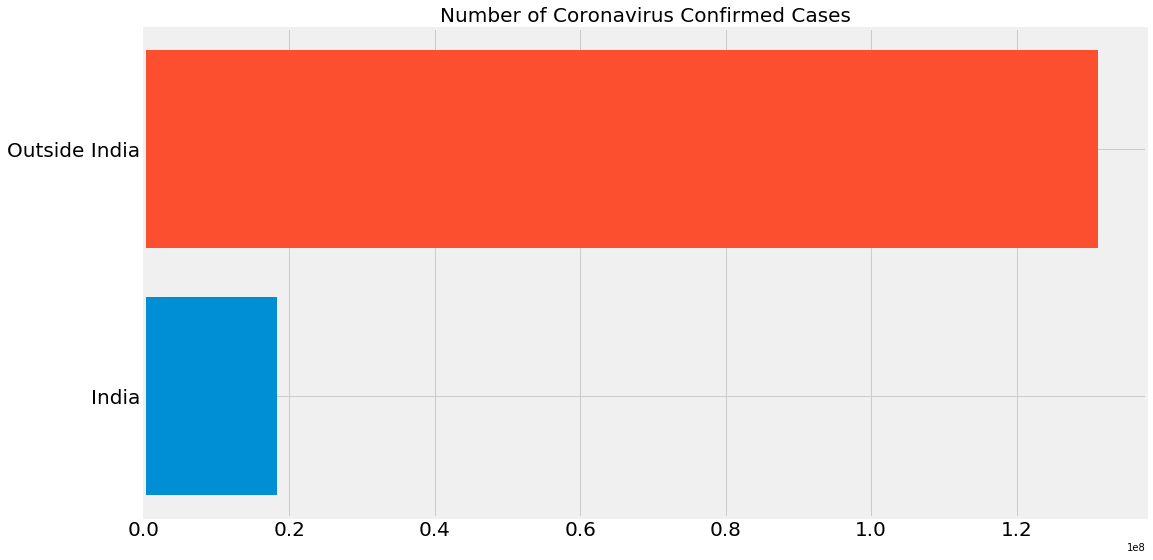

In [65]:
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(confirmed_by_country) - India_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [66]:
print('Outside India: {} cases'.format(outside_India_confirmed))
print('India: {} cases'.format(India_confirmed))
print('Total: {} cases'.format(India_confirmed+outside_India_confirmed))

Outside India: 131246443 cases
India: 18376421 cases
Total: 149622864 cases


In [67]:
confirmed_by_country

[32230850,
 18376421,
 14521289,
 5626985,
 4751026,
 4732981,
 4427390,
 3994894,
 3504799,
 3366827,
 2928890,
 2824626,
 2776927,
 2459906,
 2336944,
 2102130,
 1783339,
 1657035,
 1626033,
 1578450,
 1506476,
 1210918,
 1184271,
 1051868,
 1051779,
 1020495,
 982959,
 960520,
 838323,
 835563,
 815711,
 774399,
 754614,
 708265,
 685937,
 656077,
 614510,
 580666,
 524241,
 516301,
 510465,
 415281,
 402491,
 401593,
 381180,
 377662,
 369704,
 363895,
 355924,
 340493,
 327737,
 316521,
 312699,
 307401,
 305313,
 301831,
 294550,
 274170,
 271145,
 265819,
 255288,
 250479,
 250138,
 247857,
 245601,
 244555,
 238421,
 225528,
 224621,
 214872,
 208356,
 204289,
 197378,
 194959,
 193027,
 192326,
 176701,
 174659,
 164993,
 158326,
 151569,
 142790,
 130859,
 121580,
 121351,
 121232,
 117099,
 112156,
 104953,
 104512,
 103638,
 102446,
 97080,
 94599,
 92513,
 91484,
 90008,
 86405,
 69804,
 68922,
 66826,
 65998,
 64565,
 61699,
 61086,
 59370,
 48177,
 46600,
 45943,
 45292,

In [68]:
#Only show 10 countries with the most confirmed cases, the rest are grouped into the other category:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [70]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

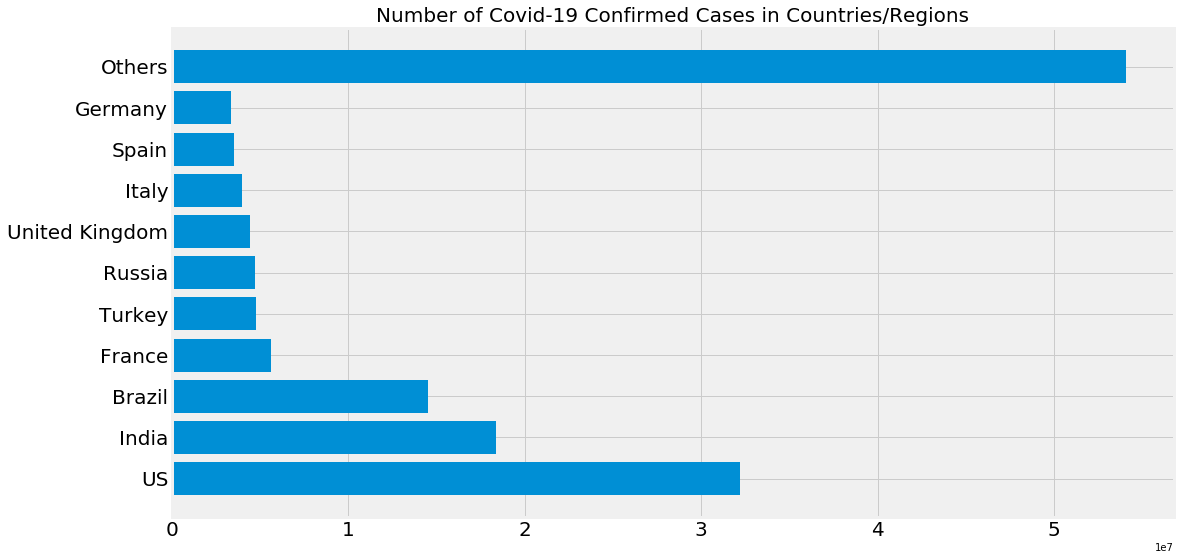

In [71]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [69]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

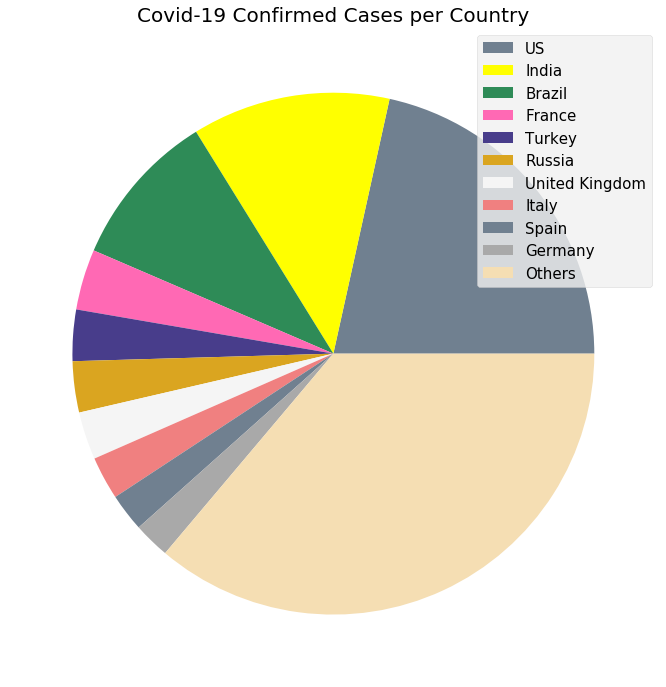

In [70]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [72]:
#Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

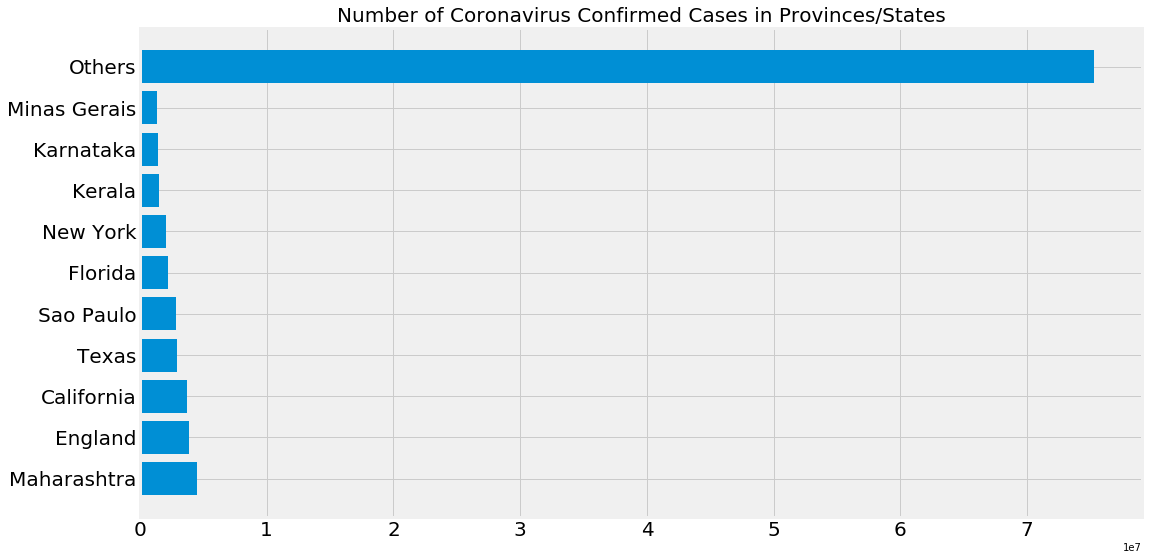

In [81]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [85]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    #remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    #only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    #additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
        plt.figure(figsize=(12,12))
        plt.title(title, size=20)
        plt.pie(confirmed_cases_10, colors=c)
        plt.legend(regions_10, loc='best', fontsize=15)
        plt.show()
        #plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

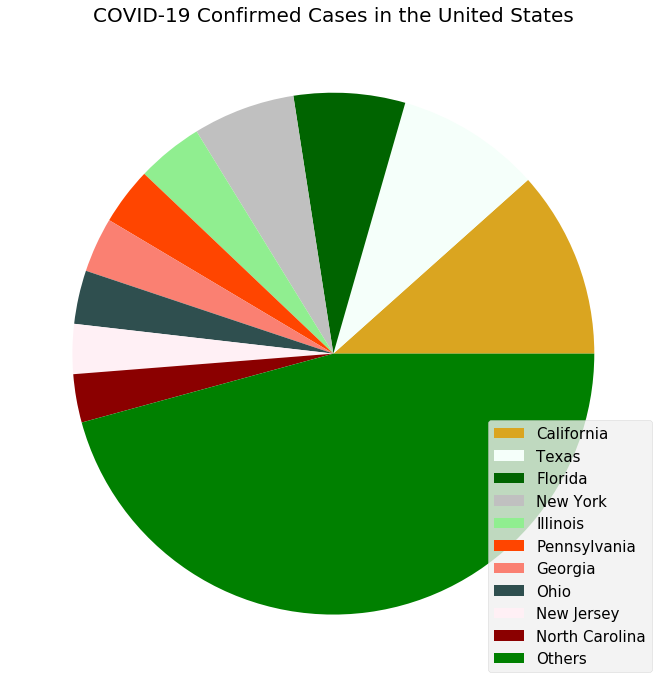

In [86]:
#Rank1:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

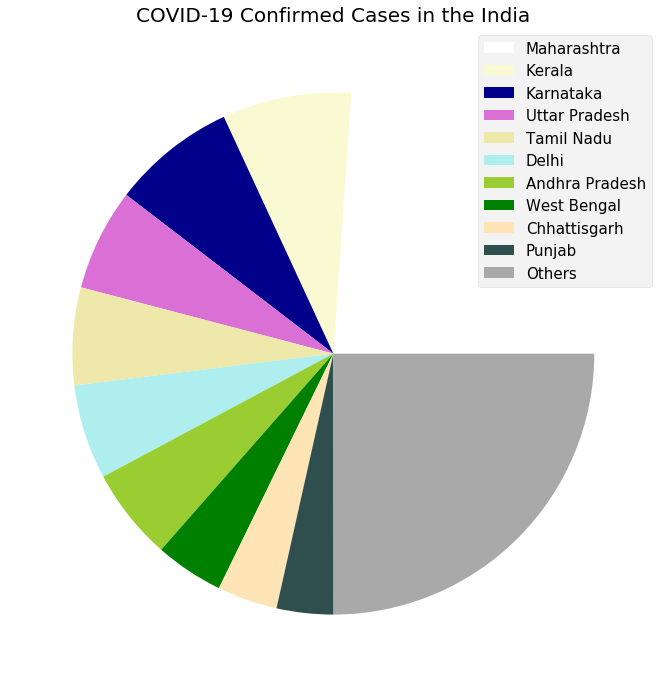

In [87]:
#Rank2:
plot_pie_country_with_regions('India', 'COVID-19 Confirmed Cases in the India')

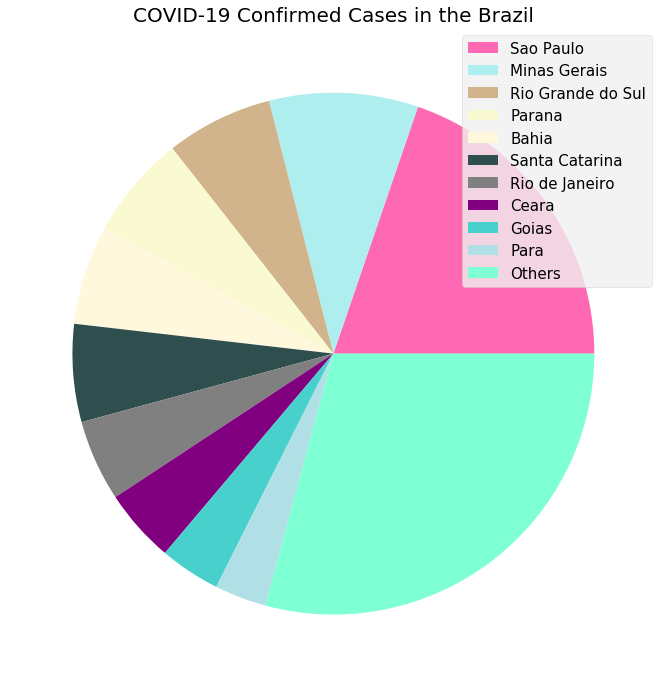

In [88]:
#Rank3:
plot_pie_country_with_regions('Brazil', 'COVID-19 Confirmed Cases in the Brazil')

In [89]:
#Predicting the future:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [90]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [91]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80399],
       [    81376],
       [    82736],
       [    84122],
       [    86013],
       [    88394],
       [    90377],
       [    92971],
       [    95279],
       [    98090],
       [   102003],
       [   106098],
       [   110047],
       [   114219],
       [   119041],
       [   126702],


In [92]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3349],
       [   3460],
       [   3564],
       [   3803],
       [   3993],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [93]:
total_recovered

array([[       30],
       [       32],
       [       39],
       [       42],
       [       56],
       [       65],
       [      108],
       [      127],
       [      145],
       [      225],
       [      287],
       [      476],
       [      627],
       [      857],
       [     1129],
       [     1492],
       [     2016],
       [     2616],
       [     3245],
       [     3947],
       [     4684],
       [     5151],
       [     6294],
       [     8057],
       [     9396],
       [    10866],
       [    12583],
       [    14352],
       [    16121],
       [    18179],
       [    18892],
       [    22889],
       [    23394],
       [    25227],
       [    27905],
       [    30386],
       [    33278],
       [    36710],
       [    39781],
       [    42717],
       [    45601],
       [    48227],
       [    51169],
       [    53795],
       [    55863],
       [    58357],
       [    60694],
       [    62493],
       [    64400],
       [    66998],


In [94]:
days_in_future = 25
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-25]

In [95]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [96]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [97]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [98]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20